<a href="https://colab.research.google.com/github/NroyAnalyst/Nishant/blob/main/cleaning%20and%20preprocessing%20of%20titanic%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [55]:
# Load the data
df = pd.read_csv('/content/competition_clean.csv')
print(df.head())

   PassengerId  Pclass     Sex  SibSp  Parch Embarked Title GrpSize FareCat  \
0          892       3    male      0      0        Q    Mr    solo    0-10   
1          893       3  female      1      0        S   Mrs  couple    0-10   
2          894       2    male      0      0        Q    Mr    solo    0-10   
3          895       3    male      0      0        S    Mr    solo    0-10   
4          896       3  female      1      1        S   Mrs   group   10-25   

  AgeCat  
0  32-48  
1  32-48  
2  48-64  
3  16-32  
4  16-32  


In [56]:
# 1. Handle missing values - fill missing AgeCat with mode
df['AgeCat'].fillna(df['AgeCat'].mode()[0], inplace=True)

/tmp/ipython-input-3147817720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeCat'].fillna(df['AgeCat'].mode()[0], inplace=True)


In [57]:
# 2. Drop unnecessary columns - PassengerId is an identifier
df.drop(columns=['PassengerId'], inplace=True)

In [58]:
# 3. Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [59]:
# 4. Scale numerical features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [60]:
# Preview the cleaned data
print(df.head())

     Pclass       Sex     SibSp     Parch  Embarked     Title   GrpSize  \
0  0.873482  0.755929 -0.499470 -0.400248 -0.470915  0.103287  0.834337   
1  0.873482 -1.322876  0.616992 -0.400248  0.700767  1.373106 -1.570855   
2 -0.315819  0.755929 -0.499470 -0.400248 -0.470915  0.103287  0.834337   
3  0.873482  0.755929 -0.499470 -0.400248  0.700767  0.103287  0.834337   
4  0.873482 -1.322876  0.616992  0.619896  0.700767  1.373106 -0.769124   

    FareCat    AgeCat  
0 -0.954248  0.880655  
1 -0.954248  0.880655  
2 -0.954248  2.167766  
3 -0.954248 -0.406456  
4 -0.312969 -0.406456  


In [67]:
# Plot count of Sex within each Age Category
age_sex_counts = df.groupby(['AgeCat', 'Sex']).size().unstack()

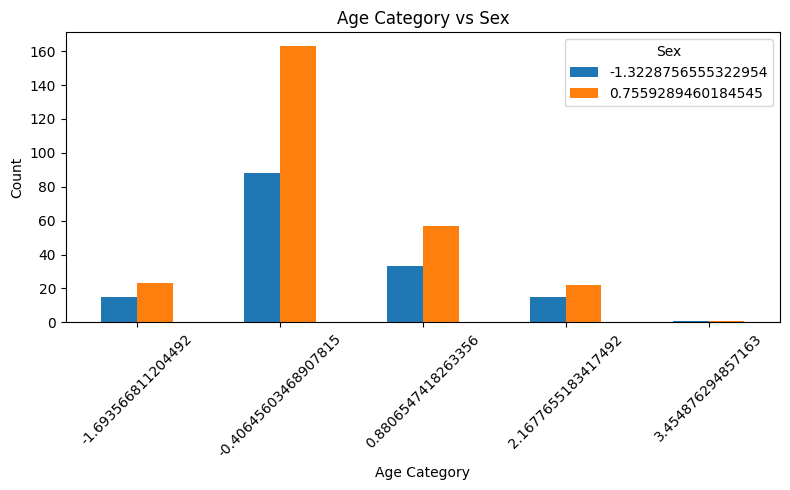

In [68]:
# Create bar plot
age_sex_counts.plot(kind='bar', figsize=(8,5))
plt.title('Age Category vs Sex')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()